## 과제 3 - 202001498 김진

In [1]:
from glob import glob

import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
station_files = glob('지역*.xls')

tmp_list = []

for file_name in station_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_list.append(tmp)

stations = pd.concat(tmp_list)

In [3]:
# 군/구 처리
gu_list = []
for address in stations['주소']:
    address_gu = address.split()[1]
    gu_list.append(address_gu)

# 군/구 추가
stations['군/구'] = gu_list

### 가격 처리 - 숫자형으로 변경
- 가격이 '-'로 표시된 경우(미기입), 숫자(int)로 변경할 때 오류가 발생하므로 따로 처리가 필요
- 가격이 기입되어 있지 않은 주유소를 제외하고 남은 휘발유와 경유 가격을 숫자(int)로 변경해 각각 gasoline_list, diesel_list에 삽입

In [32]:
# 가격이 '-'인 부분 처리
stations = stations.query("휘발유 != '-'").copy()
stations = stations.query("경유 != '-'").copy()

stations

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유,군/구
0,인천광역시,원천제2주유소,인천 계양구 벌말로 295,알뜰주유소,032-555-9143,Y,-,1573,1835,-,계양구
1,인천광역시,현대오일뱅크(주)직영 계양IC셀프주유소,인천 계양구 서부간선로 250 (박촌동),현대오일뱅크,032-552-5185,Y,1999,1583,1864,-,계양구
2,인천광역시,그린에너지,인천 계양구 솔고개길 2,S-OIL,032-584-5189,N,-,1584,1864,1650,계양구
3,인천광역시,박촌주유소,인천 계양구 장제로 1021 (박촌동),현대오일뱅크,032-519-9922,Y,-,1585,1856,-,계양구
4,인천광역시,서일석유(주) 갈현주유소,인천 계양구 드림로 764 (갈현동),GS칼텍스,032-513-8903,N,-,1595,1865,-,계양구
...,...,...,...,...,...,...,...,...,...,...,...
22,인천광역시,세광주유소,인천 강화군 선원면 중앙로 205,S-OIL,032-934-1235,N,-,1699,1899,1550,강화군
23,인천광역시,한국주유소,인천 강화군 선원면 중앙로 445,자가상표,032-933-8700,N,-,1719,1899,1600,강화군
24,인천광역시,교동주유소,인천 강화군 교동면 대룡안길54번길 5,GS칼텍스,032-932-5039,N,-,1720,1995,1600,강화군
25,인천광역시,백마외포리주유소,인천 강화군 내가면 중앙로 1301,S-OIL,032-933-8155,N,-,1790,1998,1690,강화군


In [57]:
# 휘발유 가격 처리
gasoline_list = []
for price in stations['휘발유']:
    price_new = int(price)
    gasoline_list.append(price_new)

# 경유 가격 처리
diesel_list = []
for price in stations['경유']:
    price_new = int(price)
    diesel_list.append(price_new)

### columns에 가격과 종류 추가하기
- 위에서 변환 완료된 list를 이용해 각각의 DataFrame으로 변환
- 우리가 원하는 column만 가져온 후, 가격과 종류를 추가
- 모두 추가를 하였다면 concat을 활용해 DataFrame을 하나로 합침

In [64]:
# 변환된 DataFrame을 추가해 휘발유/경유 정보를 담은 DataFrame을 각각 생성 후 concat을 이용해 합치기
stations_gasolie = stations.loc[:, ['상호', '주소', '상표', '셀프여부', '군/구']]
stations_gasolie['가격'] = gasoline_list
stations_gasolie['종류'] = '휘발유'

stations_diesel = stations.loc[:, ['상호', '주소', '상표', '셀프여부', '군/구']]
stations_diesel['가격'] = diesel_list
stations_diesel['종류'] = '경유'

stations_sel = pd.concat([stations_gasolie, stations_diesel])
stations_sel

,상호,주소,상표,셀프여부,군/구,가격,종류
0,원천제2주유소,인천 계양구 벌말로 295,알뜰주유소,Y,계양구,1573,휘발유
1,현대오일뱅크(주)직영 계양IC셀프주유소,인천 계양구 서부간선로 250 (박촌동),현대오일뱅크,Y,계양구,1583,휘발유
2,그린에너지,인천 계양구 솔고개길 2,S-OIL,N,계양구,1584,휘발유
3,박촌주유소,인천 계양구 장제로 1021 (박촌동),현대오일뱅크,Y,계양구,1585,휘발유
4,서일석유(주) 갈현주유소,인천 계양구 드림로 764 (갈현동),GS칼텍스,N,계양구,1595,휘발유
...,...,...,...,...,...,...,...
22,세광주유소,인천 강화군 선원면 중앙로 205,S-OIL,N,강화군,1899,경유
23,한국주유소,인천 강화군 선원면 중앙로 445,자가상표,N,강화군,1899,경유
24,교동주유소,인천 강화군 교동면 대룡안길54번길 5,GS칼텍스,N,강화군,1995,경유
25,백마외포리주유소,인천 강화군 내가면 중앙로 1301,S-OIL,N,강화군,1998,경유


### 과제 이미지와 동일하게 column 위치와 이름 변경 및 index 설정

In [65]:
stations_sel = pd.DataFrame(stations_sel, columns=['상호', '주소', '상표', '셀프여부', '가격', '종류', '군/구'], )

stations_sel.columns = ['주유소', '주소', '상표', '셀프여부', '가격', '종류', '군/구']
stations_set_index = stations_sel.set_index('상표')

stations_set_index

,주유소,주소,셀프여부,가격,종류,군/구
상표,,,,,,
알뜰주유소,원천제2주유소,인천 계양구 벌말로 295,Y,1573,휘발유,계양구
현대오일뱅크,현대오일뱅크(주)직영 계양IC셀프주유소,인천 계양구 서부간선로 250 (박촌동),Y,1583,휘발유,계양구
S-OIL,그린에너지,인천 계양구 솔고개길 2,N,1584,휘발유,계양구
현대오일뱅크,박촌주유소,인천 계양구 장제로 1021 (박촌동),Y,1585,휘발유,계양구
GS칼텍스,서일석유(주) 갈현주유소,인천 계양구 드림로 764 (갈현동),N,1595,휘발유,계양구
...,...,...,...,...,...,...
S-OIL,세광주유소,인천 강화군 선원면 중앙로 205,N,1899,경유,강화군
자가상표,한국주유소,인천 강화군 선원면 중앙로 445,N,1899,경유,강화군
GS칼텍스,교동주유소,인천 강화군 교동면 대룡안길54번길 5,N,1995,경유,강화군


### 그래프 그리기에 사용할 matplotlib 설정

In [66]:
plt.rc('font', family = "Malgun Gothic")
plt.rcParams['axes.unicode_minus'] = False
plt.style.use("ggplot")

plt.figure(figsize=(12, 8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

### 그래프 1) x축: 종류, y축: 가격, 색상: 셀프 여부

- 해석
    - 휘발유과 경유 각각에서 셀프 여부에 따른 가격 차이는 심하지 않다.
    - 휘발유와 경유 가격은 대략 250원 정도의 차이를 보인다.

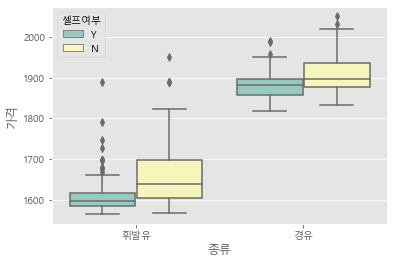

In [67]:
sns.boxplot(x="종류", y="가격", hue="셀프여부", data=stations_sel, palette="Set3")
plt.show()

### 그래프 2) x축: 상표, y축: 가격, 색상: 종류

- 해석
    - 알뜰주유소의 휘발유와 경유 가격이 다른 상표의 가격보다 낮다.
        - 휘발유와 경유 모두 중앙값을 기준으로 다른 상표에 비해 낮은 가격을 형성하고 있다는 것을 알 수 있다.
    - 상표가 있는 주유소와 달리 자가 상표로 영업하는 주유소의 개수가 확연히 적다.

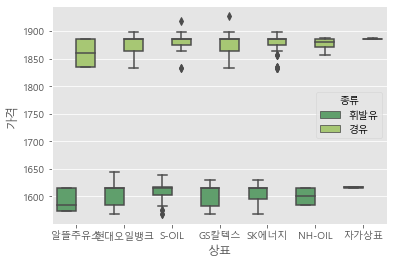

In [62]:
sns.boxplot(x="상표", y="가격", hue="종류", data=stations_sel, palette="summer")
plt.show()

### 그래프 3) x축: 군/구, y축: 가격, 색상: 종류

- 해석
    - 남구의 경우, 미추홀구로 이름이 변경되어 아직 주소명이 바뀌지 않은 곳의 값만 출력되어있다.
    - 남구를 제외하고 동구와 옹진군의 주유소의 수가 적다는 것을 확인할 수 있다.

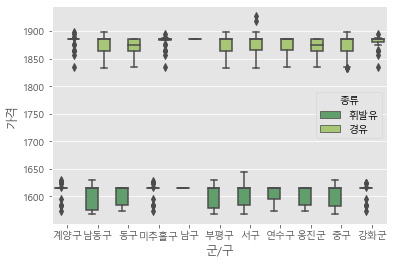

In [50]:
sns.boxplot(x="군/구", y="가격", hue="종류", data=stations_sel, palette="summer")
plt.show()